# Popular Baby Names 

Problem: What kind of female/male baby names is the most popular one? What are there patterns of names according to time? 

Approach: Rank datasets after group by sex and first letter of name, plot the name trend in the funcstion of time.

Result: Anna is the most popular female name and Leon is the most popular male name in 1880s.

Data Resource: Social Security Database


Data Explanation: National Data on the relative frequency of given names in the population of U.S. births where the individual has a Social Security Number For each year of birth YYYY after 1879, we created a comma-delimited file called yobYYYY.txt. 

In [1]:
import pandas as pd
names1880 = pd.read_csv('yob1880.txt', names=['name', 'sex', 'births'])
names1880.head(10)

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [2]:
names1880.shape

(2000, 3)

## Total birth by female and male in 1880
Find the total birth by female and male in 1880. Make a barplot on these two numbers and save it to your local drive

In [16]:
names1880.groupby(['sex']).births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

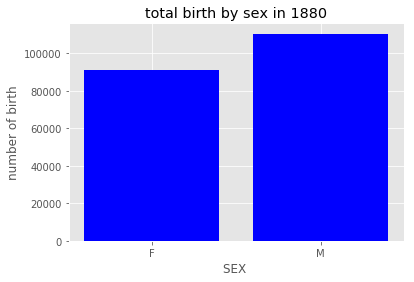

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

x = names1880.groupby(['sex']).sum().index[:]
number = names1880.groupby(['sex']).sum()['births']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, number, color='blue')
plt.xlabel("SEX ")
plt.ylabel("number of birth")
plt.title("total birth by sex in 1880")

plt.xticks(x_pos, x)

plt.show()

##  The most popular name by the first letter and by gender.

In [26]:
# write your code here
names1880['letter']=names1880.name.str[0]
names1880.sort_values('letter').groupby(['letter','sex']).first()

name  births
letter sex                  
A      F        Anna    2604
       M       Abram      21
B      F      Beulah     131
       M        Burr      11
C      F    Clifford       6
       M         Cal      19
D      F       Dosha       5
       M      Duncan      12
E      F       Etter       5
       M       Emery      52
F      F    Florence    1063
       M      Foster      16
G      F       Grace     982
       M     Garland      11
H      F      Hedwig       7
       M      Hervey       7
I      F         Icy       5
       M        Ivan      28
J      F     Janette       6
       M     Johnnie      24
K      F        Katy       7
       M       Knute       5
L      F       Louis       5
       M        Leon     118
M      F       Minda       6
       M      Merton      27
N      F      Nealie       6
       M    Napoleon      31
O      F     Octavia      27
       M        Oren      13
P      F       Pearl     569
       M      Pierre      13
Q      F       Queen      17
       M      Quincy       8
R      F       Rilla      17
       M     Raleigh      14
S      F      Sidney      16
       M      Stuart      16
T      F      Tempie       5
       M       Terry      10
U      F         Ula       5
       M       Uriah      10
V      F       Viney       6
       M      Victor     100
W      F       Wilma       5
       M       Wylie      12
Y      F       Yetta       7
       M        York       5
Z      F      Zilpha       6
       M         Zeb      10

In [31]:
years = range(1880,2011)

piece=[]
columns=['name','sex','births']

for year in years:
    path = 'babynames/yob%d.txt'%year
    frame = pd.read_csv(path,names=columns)
    frame['year']=year
    piece.append(frame)

data = pd.concat(piece,ignore_index = True)

In [32]:
data.shape

(1690784, 4)

In [33]:
data.head(10)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


## The function of trend of a name by sex and year

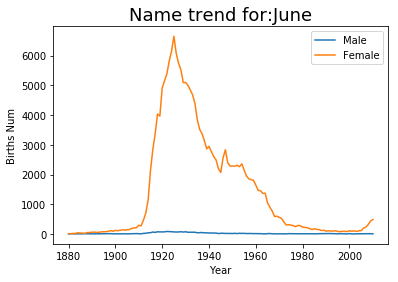

In [43]:
import matplotlib.pyplot as plt
def plot_trend(name):
    # write your code here
    group = data[data.name == name].groupby('sex')
    plt.plot(group.get_group('M').year,group.get_group('M').births,label = 'Male')
    plt.plot(group.get_group('F').year,group.get_group('F').births,label = 'Female')
    plt.title('Name trend for:'+name,fontsize=18)
    plt.xlabel('Year')
    plt.ylabel('Births Num')
    plt.legend(loc='upper right')
    plt.show()
    return
plot_trend("June")

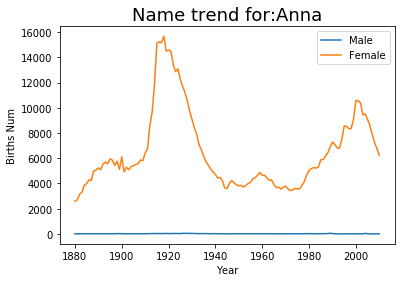

In [44]:
plot_trend("Anna")

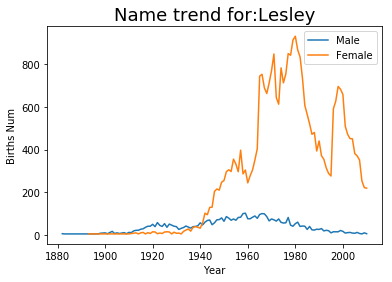

In [45]:
plot_trend("Lesley")

## Percent of boy births in year

Plot the percentage of boys af function of time. Fine there is a big decrease in births rate at 1900.

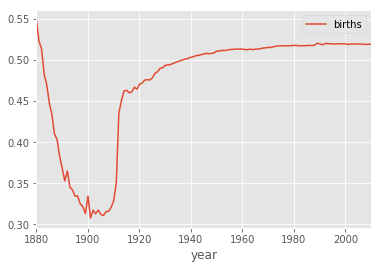

In [129]:
a=data[data['sex']=='M'].groupby('year').sum()/data.groupby('year').sum()
a.plot()